In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor




In [57]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}) 

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [58]:
columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [59]:
from catboost import CatBoostClassifier
from sympy.abc import y
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

df.drop(columns=['customerID'], axis=1, inplace=True)

model = CatBoostClassifier()

y = df['Churn']
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train, cat_features=columns)

y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))

Learning rate set to 0.02036
0:	learn: 0.6811726	total: 8.4ms	remaining: 8.39s
1:	learn: 0.6691805	total: 16ms	remaining: 7.97s
2:	learn: 0.6579149	total: 23.6ms	remaining: 7.85s
3:	learn: 0.6459400	total: 30ms	remaining: 7.48s
4:	learn: 0.6348474	total: 37.5ms	remaining: 7.46s
5:	learn: 0.6245473	total: 42.6ms	remaining: 7.05s
6:	learn: 0.6142498	total: 49ms	remaining: 6.95s
7:	learn: 0.6054532	total: 53ms	remaining: 6.57s
8:	learn: 0.5970092	total: 57ms	remaining: 6.28s
9:	learn: 0.5884947	total: 61.1ms	remaining: 6.05s
10:	learn: 0.5801698	total: 64.4ms	remaining: 5.79s
11:	learn: 0.5718752	total: 67.9ms	remaining: 5.59s
12:	learn: 0.5644523	total: 71.8ms	remaining: 5.45s
13:	learn: 0.5581913	total: 75.7ms	remaining: 5.33s
14:	learn: 0.5523558	total: 78.4ms	remaining: 5.15s
15:	learn: 0.5472099	total: 83.1ms	remaining: 5.11s
16:	learn: 0.5414545	total: 87.8ms	remaining: 5.08s
17:	learn: 0.5358347	total: 91.5ms	remaining: 4.99s
18:	learn: 0.5303823	total: 95.8ms	remaining: 4.95s
19:	

In [60]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

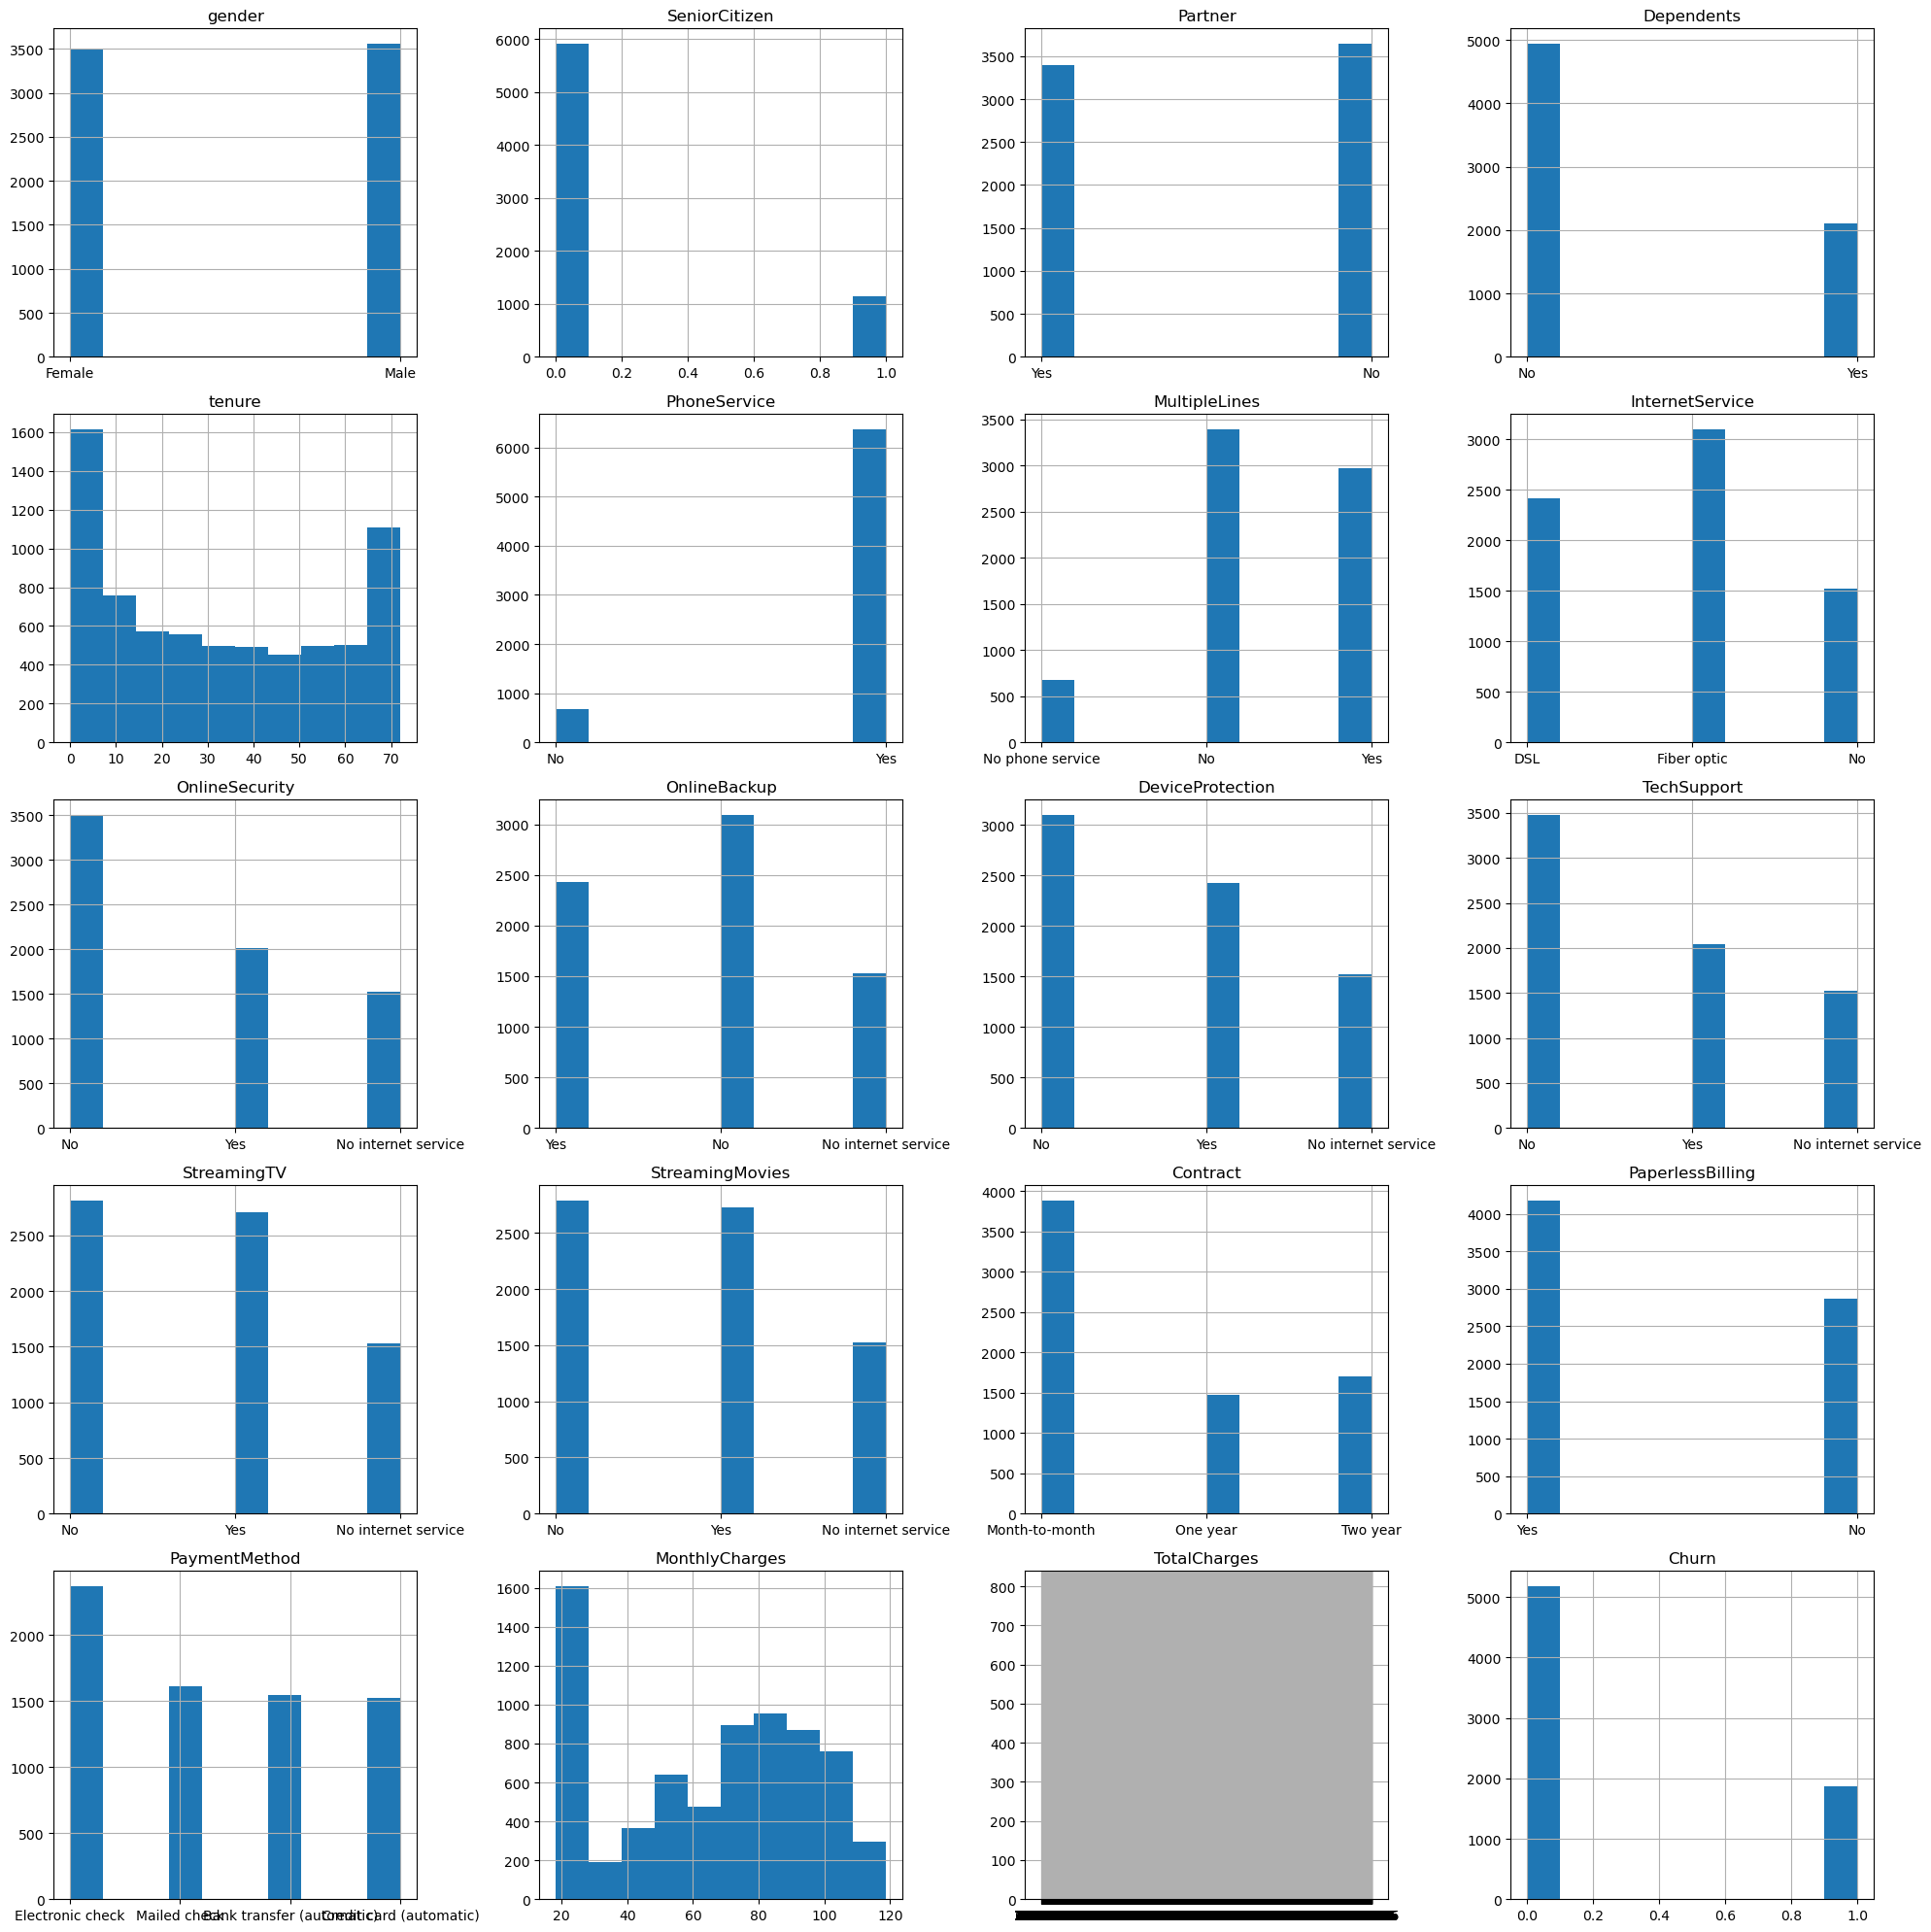

In [61]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Setting up the layout of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plotting histograms for each column
for i, column in enumerate(columns):
    ax = axes[i]  # Selecting the current axis
    df[column].hist(ax=ax)
    ax.set_title(column)  # Setting the title for the subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()